<a href="https://colab.research.google.com/github/Tina-Gh/PyTorch/blob/main/PytorchDocumentation/pytorch_02_LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### <b>Link: <a href="https://pytorch.org/tutorials/beginner/introyt/introyt1_tutorial.html" target="_blank">PyTorch Documentation</a>

## 1. Loading libraries:

In [ ]:
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt

import numpy as np

import tensorflow as tf #just to check the gpu access

## 2. Download datasets and apply transforms:

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:03<00:00, 46894504.08it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


'dog' 'ship' 'plane' 'bird'


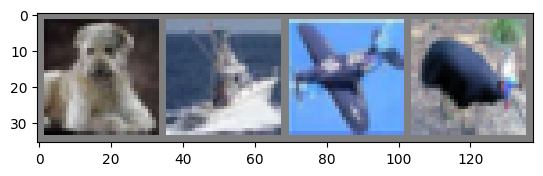

In [ ]:
#checkout the output of DataLoader:

#functions to show an image:

def imshow(img):
  img = img/2 + 0.5 #unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))

#get some random training images:
dataiter = iter(trainloader)
images, labels = next(dataiter)

#show images:
imshow(torchvision.utils.make_grid(images))

#print labels:
print(' '.join('%5a' % classes[labels[j]] for j in range(4)))

## 3. Model:

In [ ]:
#class model:

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16*5*5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    return x

net = Net()

In [ ]:
#loss function and optimizer:

criterian = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
#training loop:

n_epochs = 2
for epoch in range(n_epochs):
  running_loss = 0

  flag=1
  for i, data in enumerate(trainloader):
    inputs, labels = data

    optimizer.zero_grad() #zero the gradients for every batch
    outputs = net(inputs) #make predictions
    loss = criterian(outputs, labels) #calculate loss
    loss.backward()
    optimizer.step() #adjust learning weights

    running_loss += loss.item() #because loss is shown as: tensor(2.2839, grad_fn=<NllLossBackward0>)
    #print statistics:
    if i % 2000 == 1999: #only shows every 2000th batches for the purpose of being concise:
      print('[Epoch %d, Batch %d] loss: %.3f ' %(epoch+1, i+1, running_loss/2000))
      running_loss = 0

# print('Finished Training')

[Epoch 1, Batch 2000] loss: 1.203 
[Epoch 1, Batch 4000] loss: 1.184 
[Epoch 1, Batch 6000] loss: 1.195 
[Epoch 1, Batch 8000] loss: 1.182 
[Epoch 1, Batch 10000] loss: 1.191 
[Epoch 1, Batch 12000] loss: 1.169 
[Epoch 2, Batch 2000] loss: 1.099 
[Epoch 2, Batch 4000] loss: 1.114 
[Epoch 2, Batch 6000] loss: 1.111 
[Epoch 2, Batch 8000] loss: 1.094 
[Epoch 2, Batch 10000] loss: 1.099 
[Epoch 2, Batch 12000] loss: 1.105 


In [ ]:
!nvidia-smi

Thu Oct 17 18:04:29 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0              27W /  70W |    103MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
print(tf.test.gpu_device_name())
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(DEVICE)

/device:GPU:0
cuda:0


## 4. Inference:

In [ ]:
#check for overfitting:

for i, data in enumerate(testloader):
  images, labels = data

  outputs = net(images)

In [ ]:
outputs.shape

torch.Size([4, 10])

In [ ]:
data[0].shape

torch.Size([4, 3, 32, 32])

In [ ]:
data[1]

tensor([3, 8, 8, 0])